In [9]:
# 6.1.4 Generate random latitudes and longtitudes

In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.

# we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.


lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# the output is a zip object in memory

In [12]:
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
# If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
# where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# You can only unzip a zipped tuple once before it is removed from the computer's memory.
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [15]:
# 6.1.5 Generate random world cities

In [16]:
# With our list of random latitudes and longitudes, we'll use the coordinates in our lat_lngs tuple to find the nearest city using Python's citipy module.

# Since we haven't worked with the citipy module yet, let's import and test it. 

# Citipy doesn't come with the Anaconda module, so we'll install it in our PythonData environment.

In [17]:
# iterate through our zipped lat_lngs tuple and find the nearest city.
# When we find a city, we'll need to add it to a list so that we can use the cities to get the weather data.

In [18]:
from citipy import citipy

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [22]:
cities

['grand gaube',
 'orkney',
 'mataura',
 'marabba',
 'kuching',
 'athabasca',
 'san cristobal',
 'cherskiy',
 'bambous virieux',
 'yen bai',
 'arraial do cabo',
 'atuona',
 'kodiak',
 'rikitea',
 'molina',
 'podgorenskiy',
 'bereda',
 'sao gabriel da cachoeira',
 'gubkinskiy',
 'aparecida do taboado',
 'nguiu',
 'kuytun',
 'pangnirtung',
 'cape town',
 'moiyabana',
 'barentsburg',
 'barrow',
 'kushiro',
 'east london',
 'vila velha',
 'whitehorse',
 'padang',
 'kuche',
 'husavik',
 'almaznyy',
 'chuy',
 'takoradi',
 'necochea',
 'killybegs',
 'kavaratti',
 'yellowknife',
 'svetlopolyansk',
 'sinnamary',
 'khatanga',
 'narasannapeta',
 'rio cuarto',
 'north myrtle beach',
 'castro',
 'busselton',
 'clarksburg',
 'puerto carreno',
 'avera',
 'shymkent',
 'jinchang',
 'komsomolskiy',
 'bria',
 'chapais',
 'jamestown',
 'saldanha',
 'vaitupu',
 'punta arenas',
 'ushuaia',
 'constitucion',
 'yarkovo',
 'new norfolk',
 'lompoc',
 'uray',
 'srednekolymsk',
 'san quintin',
 'kokopo',
 'tuy hoa'

In [23]:
# 6.2.5 Parse a Response from an API

# For each city in our lats_lngs list, we need to retrieve the following data and add it to a DataFrame:

# 1. City, country, and date
# 2. Latitude and longitude
# 3. Maximum temperature
# 4. Humidity
# 5. Cloudiness
# 6. Wind speed

# Practice on Boston is done on API_practice

In [24]:
# Let's use pseudocode to map out, at a high level, how we will get the weather data for each city for the website.

# We will need to do the following:

# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
##    Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
##    City, country, and date
##    Latitude and longitude
##    Maximum temperature
##    Humidity
##    Cloudiness
##    Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [25]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [26]:
# Starting URL for Weather Map API Call.
# Navigating to the units section of the current weather data page (Links to an external site.)
# will show you the options for the unit format: standard metric, and imperial.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [27]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
# We have initialized the counters at 1 because we want the first iteration of the logging for each recorded response and
# the set to start at 1.
record_count = 1
set_count = 1

# Loop through all the cities in the list. 
# We create the for loop with the enumerate() method and reference the index and the city in the list
# as the URL will need the city name, not the index.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    # We are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+").
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    # The "pass" statement is a general purpose statement to handle all errors encountered and to allow the program to continue.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand gaube
Processing Record 2 of Set 1 | orkney
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | marabba
Processing Record 5 of Set 1 | kuching
Processing Record 6 of Set 1 | athabasca
Processing Record 7 of Set 1 | san cristobal
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | yen bai
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | molina
Processing Record 16 of Set 1 | podgorenskiy
Processing Record 17 of Set 1 | bereda
Processing Record 18 of Set 1 | sao gabriel da cachoeira
Processing Record 19 of Set 1 | gubkinskiy
Processing Record 20 of Set 1 | aparecida do taboado
Processing Record 21 of Set 1 | nguiu
City not found. Skipping...
Processing Record 22 

Processing Record 37 of Set 4 | nevelsk
Processing Record 38 of Set 4 | tiquisio
Processing Record 39 of Set 4 | ormara
Processing Record 40 of Set 4 | grindavik
Processing Record 41 of Set 4 | shingu
Processing Record 42 of Set 4 | port blair
Processing Record 43 of Set 4 | albany
Processing Record 44 of Set 4 | deputatskiy
Processing Record 45 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 46 of Set 4 | saint-pierre
Processing Record 47 of Set 4 | luganville
Processing Record 48 of Set 4 | tabou
Processing Record 49 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 50 of Set 4 | hithadhoo
Processing Record 1 of Set 5 | evanston
Processing Record 2 of Set 5 | port hueneme
Processing Record 3 of Set 5 | adrar
Processing Record 4 of Set 5 | marawi
Processing Record 5 of Set 5 | thunder bay
Processing Record 6 of Set 5 | port alfred
Processing Record 7 of Set 5 | las vegas
Processing Record 8 of Set 5 | isabela
Processing Record 9 of Set 5 | 

Processing Record 30 of Set 8 | bull savanna
Processing Record 31 of Set 8 | pacific grove
Processing Record 32 of Set 8 | kurchum
Processing Record 33 of Set 8 | xining
Processing Record 34 of Set 8 | san jeronimo
Processing Record 35 of Set 8 | acahay
Processing Record 36 of Set 8 | marsh harbour
Processing Record 37 of Set 8 | fare
Processing Record 38 of Set 8 | muravlenko
Processing Record 39 of Set 8 | podgornoye
Processing Record 40 of Set 8 | rantauprapat
Processing Record 41 of Set 8 | cranbrook
Processing Record 42 of Set 8 | caravelas
Processing Record 43 of Set 8 | muriwai beach
Processing Record 44 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 45 of Set 8 | laurel
Processing Record 46 of Set 8 | makeni
Processing Record 47 of Set 8 | sao jose da coroa grande
Processing Record 48 of Set 8 | fairbanks
Processing Record 49 of Set 8 | luau
Processing Record 50 of Set 8 | jabiru
City not found. Skipping...
Processing Record 1 of Set 9 | kanungu
Processing R

Processing Record 14 of Set 12 | karratha
Processing Record 15 of Set 12 | mehamn
Processing Record 16 of Set 12 | maroantsetra
Processing Record 17 of Set 12 | ternate
Processing Record 18 of Set 12 | sedelnikovo
City not found. Skipping...
Processing Record 19 of Set 12 | cabedelo
Processing Record 20 of Set 12 | auki
Processing Record 21 of Set 12 | jega
Processing Record 22 of Set 12 | tautira
Processing Record 23 of Set 12 | rudsar
Processing Record 24 of Set 12 | tynda
Processing Record 25 of Set 12 | udachnyy
Processing Record 26 of Set 12 | rovaniemi
Processing Record 27 of Set 12 | rio grande
Processing Record 28 of Set 12 | sars
Processing Record 29 of Set 12 | monroe
Processing Record 30 of Set 12 | tessalit
Processing Record 31 of Set 12 | emirdag
Processing Record 32 of Set 12 | odienne
Processing Record 33 of Set 12 | banda aceh
Processing Record 34 of Set 12 | conselheiro lafaiete
Processing Record 35 of Set 12 | saint-joseph
Processing Record 36 of Set 12 | roald
Proces

In [29]:
len(city_data)

544

In [30]:
# 6.2.7 Create a dataframe of city weather data

# Recall that we can convert a list of dictionaries to a Pandas DataFrame using 
# df = pd.DataFrame(list with dictionaries).

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grand Gaube,-20.01,57.66,75.99,75,28,3.00,MU,2020-11-22 17:20:09
1,Orkney,-26.98,26.67,73.87,61,48,14.45,ZA,2020-11-22 17:20:09
2,Mataura,-46.19,168.86,41.00,94,87,1.01,NZ,2020-11-22 17:20:10
3,Marabba,12.35,32.18,83.48,20,46,10.94,SD,2020-11-22 17:20:10
4,Kuching,1.55,110.33,77.00,94,40,3.36,MY,2020-11-22 17:20:10
5,Athabasca,54.72,-113.29,12.20,92,86,2.24,CA,2020-11-22 17:20:10
6,San Cristobal,7.77,-72.22,86.00,58,40,6.93,VE,2020-11-22 17:20:10
7,Cherskiy,68.75,161.30,3.83,93,100,4.32,RU,2020-11-22 17:20:11
8,Bambous Virieux,-20.34,57.76,75.99,88,75,10.29,MU,2020-11-22 17:20:11
9,Yen Bai,21.70,104.87,74.82,82,88,2.89,VN,2020-11-22 17:20:11


In [32]:
# Next, we'll reorder the columns as 
# City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, 
# so they are easy to read.

In [33]:
# Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:

new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

# Then, we assign a new or the same DataFrame with new column order:

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grand Gaube,MU,2020-11-22 17:20:09,-20.01,57.66,75.99,75,28,3.00
1,Orkney,ZA,2020-11-22 17:20:09,-26.98,26.67,73.87,61,48,14.45
2,Mataura,NZ,2020-11-22 17:20:10,-46.19,168.86,41.00,94,87,1.01
3,Marabba,SD,2020-11-22 17:20:10,12.35,32.18,83.48,20,46,10.94
4,Kuching,MY,2020-11-22 17:20:10,1.55,110.33,77.00,94,40,3.36
5,Athabasca,CA,2020-11-22 17:20:10,54.72,-113.29,12.20,92,86,2.24
6,San Cristobal,VE,2020-11-22 17:20:10,7.77,-72.22,86.00,58,40,6.93
7,Cherskiy,RU,2020-11-22 17:20:11,68.75,161.30,3.83,93,100,4.32
8,Bambous Virieux,MU,2020-11-22 17:20:11,-20.34,57.76,75.99,88,75,10.29
9,Yen Bai,VN,2020-11-22 17:20:11,21.70,104.87,74.82,82,88,2.89


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# new csv file named "cities.csv" is created in the new folder "weather_data" created separately.

In [37]:
# 6.3.1 Plot Latitude vs Temparature

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [39]:
# See API_practice for converting datetime in seconds to date format

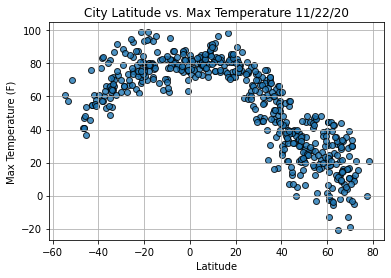

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

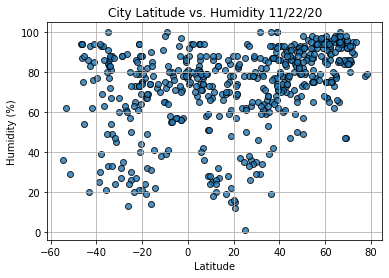

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

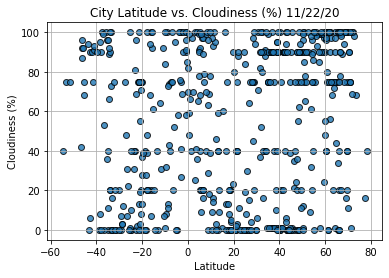

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

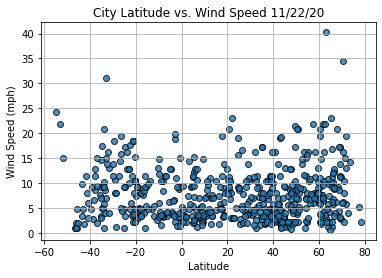

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [53]:
# 6.4.2 Find the correlation between latitude and maximum temp

# We want to perform linear regression on latitude and maximum temperature from each hemisphere DataFrame.

In [83]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(linregress(x_values, y_values))

In [84]:
# Using loc to filter dataframe based on index number
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2020-11-22 17:20:11
Lat                        -23.12
Lng                       -134.97
Max Temp                    74.25
Humidity                       73
Cloudiness                     81
Wind Speed                  10.04
Name: 13, dtype: object

In [85]:
# Using loc to filter dataframe based on a value of a row. 

# Eg filter for Northern Hemisphere latitudes (lats >= 0)
# Below function will return True or False for each row
city_data_df["Lat"] >= 0.

0      False
1      False
2      False
3       True
4       True
       ...  
539     True
540     True
541     True
542    False
543     True
Name: Lat, Length: 544, dtype: bool

In [86]:
# If we want to return a DataFrame with all data fitting the criteria ,we can use the loc method on the city_data_df DataFrame.

city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Marabba,SD,2020-11-22 17:20:10,12.35,32.18,83.48,20,46,10.94
4,Kuching,MY,2020-11-22 17:20:10,1.55,110.33,77.00,94,40,3.36
5,Athabasca,CA,2020-11-22 17:20:10,54.72,-113.29,12.20,92,86,2.24
6,San Cristobal,VE,2020-11-22 17:20:10,7.77,-72.22,86.00,58,40,6.93
7,Cherskiy,RU,2020-11-22 17:20:11,68.75,161.30,3.83,93,100,4.32
...,...,...,...,...,...,...,...,...,...
538,Baykit,RU,2020-11-22 17:21:28,61.67,96.37,21.00,94,100,6.96
539,Egvekinot,RU,2020-11-22 17:21:29,66.32,-179.17,21.34,98,100,11.90
540,Mosjoen,NO,2020-11-22 17:21:29,65.84,13.19,44.01,86,75,2.24
541,Xiamen,CN,2020-11-22 17:20:58,24.48,118.08,73.40,78,90,15.66


In [87]:
# Do the same for lat <0 . Assign dataframe to the variables "northern_hemi_df" and "southern_hemi_df"

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

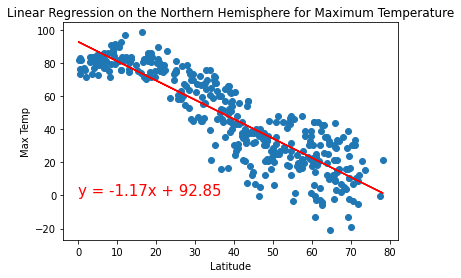

LinregressResult(slope=-1.1690476264139322, intercept=92.85100200143421, rvalue=-0.8816397554517263, pvalue=4.982059936434963e-124, stderr=0.032357607671706694)


In [88]:
# To generate the linear regression on the maximum temperature for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,0))

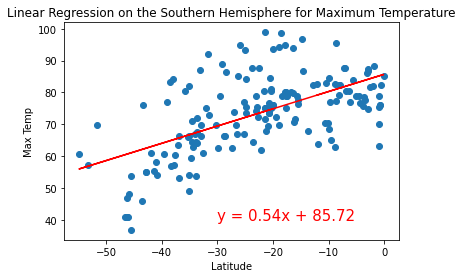

LinregressResult(slope=0.5428148747401115, intercept=85.7208988742166, rvalue=0.593963319252026, pvalue=2.1353518919438617e-17, stderr=0.05706369194397411)


In [89]:
# To generate the linear regression on the maximum temperature for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-30,40))

In [90]:
# Check the rvalues before stating any findings from the regression

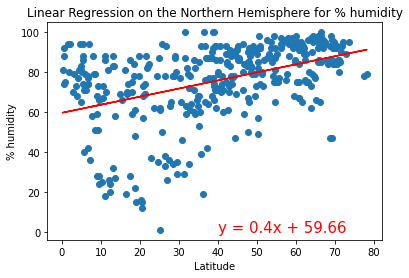

LinregressResult(slope=0.4044576396312855, intercept=59.664231722761826, rvalue=0.4304357656573177, pvalue=2.1648928582298442e-18, stderr=0.043856546168216236)


In [96]:
# To generate the linear regression on the Percent Humidity for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % humidity', '% humidity',(40,0))

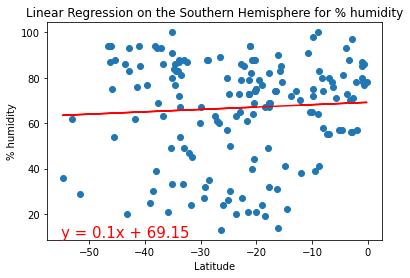

LinregressResult(slope=0.10412007747358618, intercept=69.15042998810725, rvalue=0.06190634981437779, pvalue=0.4253510126540899, stderr=0.13029010921603057)


In [98]:
# To generate the linear regression on the Percent Humidity for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % humidity', '% humidity',(-55,10))

In [106]:
# Correlation between latitude and percent humidity is very low based on r-values from both regressions.

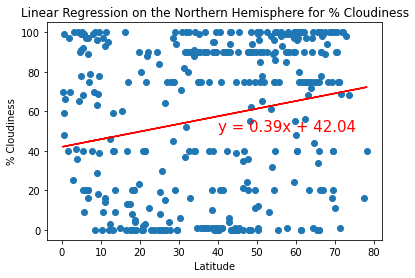

LinregressResult(slope=0.38627866424890744, intercept=42.03571924393533, rvalue=0.20918589133705953, pvalue=4.349652074096675e-05, stderr=0.09337191584302952)


In [103]:
# To generate the linear regression on the Percent Cloudiness for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,50))

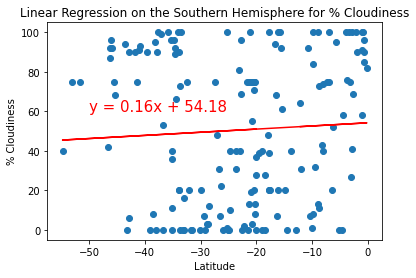

LinregressResult(slope=0.15905502657778134, intercept=54.177843065524144, rvalue=0.0568604825413308, pvalue=0.4641159640644612, stderr=0.21676023556425275)


In [104]:
# To generate the linear regression on the Percent Cloudiness for the Southern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

In [105]:
# Correlation between latitude and percent cloudiness is very low based on r-values from both regressions.

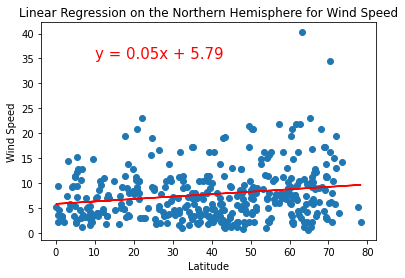

LinregressResult(slope=0.04882312872856422, intercept=5.78970411808932, rvalue=0.189222500506527, pvalue=0.0002239579017257586, stderr=0.013100848703757864)


In [109]:
# To generate the linear regression on Wind Speed for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,35))

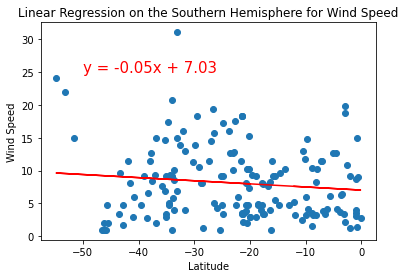

LinregressResult(slope=-0.0474360665623261, intercept=7.032302019703057, rvalue=-0.11506420563423037, pvalue=0.13748948887356807, stderr=0.03178485251824021)


In [112]:
# To generate the linear regression on Wind Speed for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))

In [113]:
# Correlation between latitude and Wind Speed is very low based on r-values from both regressions.